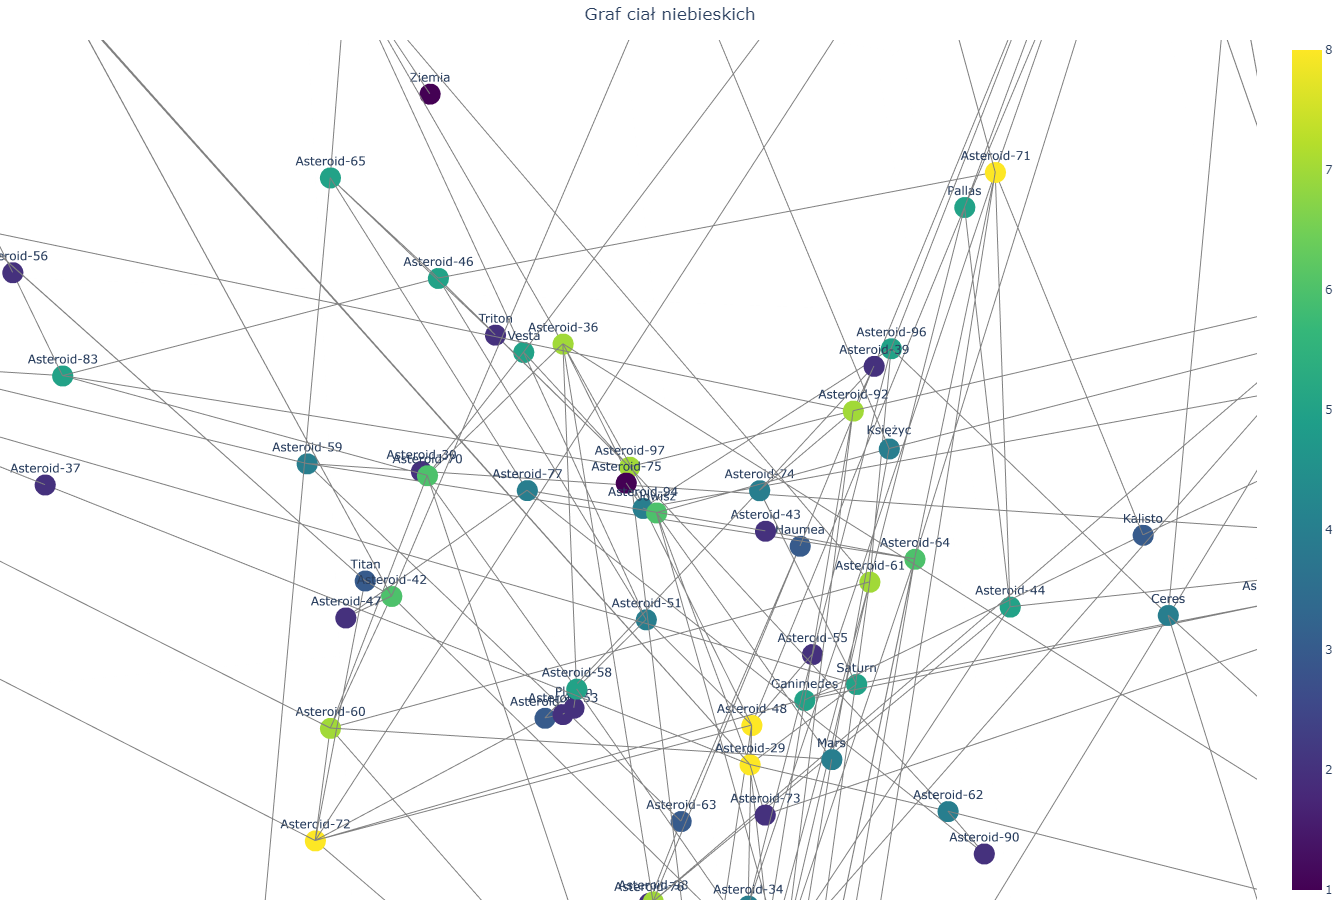

In [2]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import random


file_path = "extended_celestial_edges_2.csv"
edges = pd.read_csv(file_path)


G = nx.DiGraph()
for _, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])
pos = nx.spring_layout(G, dim=3, seed=42)  
data_edges = []
x_nodes, y_nodes, z_nodes = [], [], []

for node, (x, y, z) in pos.items():
    x_nodes.append(x)
    y_nodes.append(y)
    z_nodes.append(z)

for edge in G.edges(data=True):
    x_edge = [pos[edge[0]][0], pos[edge[1]][0], None]
    y_edge = [pos[edge[0]][1], pos[edge[1]][1], None]
    z_edge = [pos[edge[0]][2], pos[edge[1]][2], None]
    data_edges.append(go.Scatter3d(
        x=x_edge, y=y_edge, z=z_edge,
        mode='lines',
        line=dict(width=2, color='gray'),
        hoverinfo='none'
    ))
node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    marker=dict(
        size=12,
        color=[G.degree(node) for node in G.nodes], 
        colorscale='Viridis',
        showscale=True
    ),
    text=list(G.nodes),
    textposition='top center',
    hoverinfo='text'
)

fig = go.Figure(data=data_edges + [node_trace])

fig.update_layout(
    title={
        'text': "Graf ciał niebieskich",
        'x': 0.5,
        'xanchor': 'center'
    },
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False, title='X', titlefont=dict(size=14)),
        yaxis=dict(showbackground=False, title='Y', titlefont=dict(size=14)),
        zaxis=dict(showbackground=False, title='Z', titlefont=dict(size=14)),
        aspectmode='data'
    ),
    margin=dict(l=0, r=0, t=40, b=0),
    height=900,
    width=1200
)

fig.show()


In [14]:
import pandas as pd
import random

# Lista rzeczywistych nazw ciał niebieskich
stars = ["Słońce"]
planets = ["Merkury", "Wenus", "Ziemia", "Mars", "Jowisz", "Saturn", "Uran", "Neptun"]
moons = ["Księżyc", "Io", "Europa", "Ganimedes", "Kalisto", "Titan", "Enceladus", "Triton", "Charon"]
astroids = ["Ceres", "Pallas", "Vesta", "Hygiea"]
dwarf_planets = ["Pluton", "Haumea", "Makemake", "Eris"]

# Łączenie wszystkich nazw w jedną listę
bodies = (
    [{"name": name, "type": "Star"} for name in stars] +
    [{"name": name, "type": "Planet"} for name in planets] +
    [{"name": name, "type": "Moon"} for name in moons] +
    [{"name": name, "type": "Asteroid"} for name in astroids] +
    [{"name": name, "type": "Dwarf Planet"} for name in dwarf_planets]
)

# Uzupełnienie listy do 100 ciał losowymi asteroidami
while len(bodies) < 100:
    bodies.append({"name": f"Asteroid-{len(bodies)}", "type": "Asteroid"})

# Generowanie relacji między ciałami (~200 relacji)
relations = []
relation_types = ["Orbita", "Exploration", "Gravitational Interaction", "Data Exchange"]

for _ in range(200):
    source = random.choice(bodies)["name"]
    target = random.choice(bodies)["name"]
    while source == target:  # Unikamy relacji do samego siebie
        target = random.choice(bodies)["name"]
    relation_type = random.choice(relation_types)
    weight = random.randint(1, 100)
    relations.append({"Source": source, "Target": target, "Relation": relation_type, "Weight": weight})

# Konwersja do DataFrame
relations_df = pd.DataFrame(relations)

# Zapis do pliku CSV
output_path = "extended_celestial_edges_2.csv"
relations_df.to_csv(output_path, index=False)

print(f"Dane zostały zapisane do pliku {output_path}. Zaimportuj go, aby przeanalizować graf.")


Dane zostały zapisane do pliku extended_celestial_edges_2.csv. Zaimportuj go, aby przeanalizować graf.
